In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering 

1-Uploaded the twitter_archive_enhanced.csv to the jupyter notebook cloud and importing it to a dataframe

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2-Downloading the image predictions tsv file by using requests library and saving it , and importing it to a data frame

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1] ,'wb') as file :
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3-Import Json data from Twitter using Tweepy

In [123]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True , wait_on_rate_limit_notify= True)


Experiment to extract one tweet_id infotmation

In [9]:
exp_tweet = api.get_status(twitter_archive.tweet_id[1000] ,wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

Checking the keys of the test tweet

In [15]:
content['retweet_count'],content['user']['followers_count'],content['favorite_count']

(2102, 8851693, 5706)

Quering Json Data from the Api and saving them in tweet_json.txt file

In [11]:

errors = []

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt' ,'w') as file:
        #save the start time before Quering to make code timer
        start_time = time.time()
        
        for tweet_id in twitter_archive['tweet_id']:
            try :
                tweet = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True,tweet_mode= 'extended')
                json.dump(tweet._json,file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)
                
            #print each tweet id and time elapsed    
            print('The tweet id is ' , tweet_id)
      
        #print time elapsed to query all the data
        print('time elapsed ' , time.time() - start_time)

        

The tweet id is  892420643555336193
The tweet id is  892177421306343426
The tweet id is  891815181378084864
The tweet id is  891689557279858688
The tweet id is  891327558926688256
The tweet id is  891087950875897856
The tweet id is  890971913173991426
The tweet id is  890729181411237888
The tweet id is  890609185150312448
The tweet id is  890240255349198849
The tweet id is  890006608113172480
The tweet id is  889880896479866881
The tweet id is  889665388333682689
The tweet id is  889638837579907072
The tweet id is  889531135344209921
The tweet id is  889278841981685760
The tweet id is  888917238123831296
The tweet id is  888804989199671297
The tweet id is  888554962724278272
Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
The tweet id is  888202515573088257
The tweet id is  888078434458587136
The tweet id is  887705289381826560
The tweet id is  887517139158093824
The tweet id is  887473957103951883
The tweet id is  887343217045368832
The

In [4]:
#Read json data line by line into Pandas dataframe
list_of_tweets = []
with open ('tweet_json.txt' , 'r') as file :
    for line in file:
        tweet = json.loads(line)
        list_of_tweets.append(tweet)
    
    api_df = pd.DataFrame.from_dict(list_of_tweets)
  
    # make dataframe with the desired columns
    api_df = api_df[['id' , 'retweet_count' , 'favorite_count']]

In [5]:
#checking the new dataframe
api_df.sample()

,id,retweet_count,favorite_count
57,880935762899988482,2505,15857


In [6]:
api_df.shape

(2331, 3)

# Assessing the Gathered Data

### Visual Assessment

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,7553,35730
1,892177421306343426,5599,30871
2,891815181378084864,3709,23220
3,891689557279858688,7737,39026
4,891327558926688256,8335,37276
5,891087950875897856,2797,18794
6,890971913173991426,1817,10919
7,890729181411237888,16900,60220
8,890609185150312448,3850,25849
9,890240255349198849,6573,29517


#### Tidiness

change id column to tweet_id to facilitate merging

### Programmatic Assessment

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [54]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
twitter_archive.duplicated().unique()

array([False], dtype=bool)

In [29]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Buddy         7
Bailey        7
Daisy         7
Toby          7
Rusty         6
Dave          6
Stanley       6
Leo           6
Bella         6
Koda          6
Scout         6
Oscar         6
Jack          6
Milo          6
Jax           6
Alfie         5
           ... 
Raphael       1
Fwed          1
Malikai       1
Brian         1
Brudge        1
Cilantro      1
Kenzie        1
Griswold      1
Kollin        1
Halo          1
Amélie        1
Emma          1
Roscoe        1
Tripp         1
Dex           1
Maya          1
Bobb          1
Kody          1
Ronduh        1
Anthony       1
Mabel         1
Kendall       1
Bloop         1
Mo            1
Ralphson      1
Skye          1
Amber         1
Tess          1
Jersey        1
Combo         1
Name: name, Length: 957,

In [46]:
twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [44]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [8]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [143]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [147]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [151]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                           1
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq    1
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                         1
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                             1
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                     1
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                           

In [51]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [60]:
image_predictions.duplicated().unique()

array([False], dtype=bool)

In [23]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [24]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2655.943372,7464.385242
std,6.823170e+16,4491.986728,11589.926257
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,539.000000,1299.000000
50%,7.182469e+17,1243.000000,3245.000000
75%,7.986692e+17,3084.000000,9142.500000
max,8.924206e+17,76328.000000,154045.000000


In [27]:
api_df.duplicated().unique()

array([False], dtype=bool)

### Assessment summary

### Quality issues

##### twitter archive :

* Extra +0000 in the time_stamp

* timestamp data type is object

* dogs names are None or incomplete as a,an,the

* Many retweets 

* Many replies to tweets

* The source column values include html code

* Empty values are stored as None string and need to be changed to nan

* most of dogs are not classified

* denominator column records have weired values

* Unnecessary columns like in_reply_to_status_id  and retweeted_status_id

* some decimal numerator ratings in tweet text is extracted wrong to the numerator ratings column

##### image_predictions:

* tweets have weired image predictions like microwave and sliding doors.

* unnecessary columns like image number

* Column names are not describtive

### Tidiness issues 

* Merge the twitter_archive dataframe with the api_df data and the image_predictions dataframe on the id column to create one master dataframe

* there are four dog classification columns which can be only one


## Cleaning

### twitter archive

In [37]:
#make a copy of the twitter archive dataframe
archive_clean = twitter_archive.copy()

archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None


##### Define:
Remove extra string from timestamp by string slicing


##### Code:

In [38]:
# remove extra chars from timestamp string
archive_clean['timestamp'] = archive_clean['timestamp'].str[0:-5]

##### Test:

In [39]:
archive_clean['timestamp'].sample(5)

747     2016-09-25 00:06:08 
954     2016-07-09 15:02:31 
769     2016-09-17 16:57:35 
2065    2015-11-30 02:18:39 
2262    2015-11-20 03:35:20 
Name: timestamp, dtype: object

##### Define:
Change timestamp data type to datetime using pandas to_datetime method

##### Code:

In [40]:
#change timestamp type to datatime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format = '%Y-%m-%d %H:%M:%S')

##### Test:

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

##### Define:
filtering archive dataframe to include only original tweets by using .isnull() function

##### Code:

In [42]:
#remove replies and retweets and keep only original tweets
archive_clean= archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean= archive_clean[archive_clean['retweeted_status_id'].isnull()]

##### Test:

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

##### Define:
filter the archive dataframe to delete tweets with weired dog names by using isin() function and use a list of observed weired names 

##### Code:

In [44]:
#remove name records with weired values 
archive_clean = archive_clean.drop(archive_clean[archive_clean.name.isin(['a','an','the','None','very','my','Bookstore'])].index)

##### Test:

In [45]:
archive_clean.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
Daisy        7
Toby         7
Bo           6
Bella        6
Jax          6
Bailey       6
Oscar        6
Stanley      6
Koda         6
Buddy        5
Chester      5
Milo         5
Leo          5
Louis        5
Bentley      5
Rusty        5
Dave         5
Scout        5
Larry        4
Sophie       4
Gary         4
            ..
Eve          1
Nigel        1
Sora         1
Geno         1
Huck         1
Danny        1
Timofy       1
Jett         1
Seamus       1
Iroh         1
Brat         1
Superpup     1
Kobe         1
Vinnie       1
life         1
Blipson      1
Dylan        1
Pherb        1
Blu          1
Yukon        1
Sonny        1
Randall      1
Izzy         1
Tommy        1
Alf          1
Ruffles      1
Iggy         1
Harvey       1
Mimosa       1
Rizzy        1
Name: name, Length: 948, dtype: int64

##### Define:
Extract source url from the html code in source column by slicing the string 

##### Code:

In [46]:
#remove html code from the source column values
archive_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [47]:
archive_clean.source[0].split("\"")[1]

'http://twitter.com/download/iphone'

In [48]:
archive_clean['source'] = archive_clean['source'].str.split("\"").apply(lambda x: x[1])

##### Test:

In [49]:
archive_clean.source.value_counts()

http://twitter.com/download/iphone              1348
http://vine.co                                    44
http://twitter.com                                17
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

##### Define:
make one column for dog class and drop the other class columns considering tweets with multiple classification

##### Code:

In [50]:
# handle none values
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into one column
archive_clean['dog_class'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple classes
archive_clean.loc[archive_clean.dog_class == 'doggopupper', 'dog_class'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_class == 'doggofloofer', 'dog_class'] = 'doggo, floofer'


# handle missing values
archive_clean.loc[archive_clean.dog_class == '', 'dog_class'] = np.nan

In [51]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1)

##### Test:

In [52]:
archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47,http://twitter.com/download/iphone,This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,NaN


In [53]:
archive_clean.dog_class.value_counts()

pupper           126
doggo             40
puppo             16
floofer            5
doggo, pupper      5
Name: dog_class, dtype: int64

##### Define:
Replace None string values to numpy nan to facilite analysis using replace() method

##### Code:

In [54]:
 archive_clean = archive_clean.replace('None',np.nan)

##### Test:

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419 entries, 0 to 2326
Data columns (total 14 columns):
tweet_id                      1419 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1419 non-null datetime64[ns]
source                        1419 non-null object
text                          1419 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1419 non-null object
rating_numerator              1419 non-null int64
rating_denominator            1419 non-null int64
name                          1419 non-null object
dog_class                     192 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 206.3+ KB


##### Define:
Filter dataframe to remove tweets with wired denominator values

##### Code:

In [56]:
archive_clean['rating_denominator'].value_counts()

10     1415
170       1
50        1
11        1
7         1
Name: rating_denominator, dtype: int64

In [57]:
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

##### Test:

In [58]:
archive_clean['rating_denominator'].value_counts()

10    1415
Name: rating_denominator, dtype: int64

##### Define:
Correct numerator ratings by Extracting decimal ratings from text and assign it to numerator ratings column

##### Code:

In [63]:
decimal_df = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*\/\d+)")
decimal_df.rename( columns={0 :'ratings'}, inplace=True )
decimal_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,ratings
45,13.5/10
695,9.75/10
763,11.27/10


In [60]:
decimal_df.ratings = decimal_df.ratings.str[:-3]

In [64]:
archive_clean.loc[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)") ,'rating_numerator'] = decimal_df.ratings.str[:-3].astype('float64')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


##### Test:

In [65]:
archive_clean['rating_numerator'].value_counts()

12.00      350
11.00      317
10.00      282
13.00      186
9.00       102
8.00        72
7.00        32
14.00       20
6.00        18
5.00        13
3.00        10
4.00         5
2.00         4
9.75         1
11.27        1
13.50        1
1776.00      1
Name: rating_numerator, dtype: int64

##### Define:
Drop unnecessary Columns in the archive Dataframe

##### Code:

In [67]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 14 columns):
tweet_id                      1415 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1415 non-null datetime64[ns]
source                        1415 non-null object
text                          1415 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1415 non-null object
rating_numerator              1415 non-null float64
rating_denominator            1415 non-null int64
name                          1415 non-null object
dog_class                     192 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 165.8+ KB


In [68]:
#remove unnecessary columns
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'
                                    ,'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

##### Test:

In [69]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 9 columns):
tweet_id              1415 non-null int64
timestamp             1415 non-null datetime64[ns]
source                1415 non-null object
text                  1415 non-null object
expanded_urls         1415 non-null object
rating_numerator      1415 non-null float64
rating_denominator    1415 non-null int64
name                  1415 non-null object
dog_class             192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 110.5+ KB


### image_predictions table

In [70]:
#make copy of the original dataframe
predictions_clean = image_predictions.copy()
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define:
remove tweets with weired prediction values (where all bread predictions are false)

##### Code:

In [71]:
predictions_clean =  predictions_clean[(predictions_clean.p1_dog == True) & 
                                       (predictions_clean.p2_dog == True) & (predictions_clean.p3_dog == True )]

##### Test:

In [72]:
predictions_clean.p1.value_counts()

golden_retriever                  126
Pembroke                           78
Labrador_retriever                 77
Chihuahua                          54
pug                                41
Pomeranian                         28
Samoyed                            27
chow                               27
toy_poodle                         27
malamute                           26
cocker_spaniel                     25
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
German_shepherd                    17
Staffordshire_bullterrier          17
Siberian_husky                     17
Cardigan                           16
Chesapeake_Bay_retriever           15
Rottweiler                         15
Maltese_dog                        15
Shetland_sheepdog                  15
Shih-Tzu                           15
Lakeland_terrier                   14
Eskimo_dog                         14
Italian_greyhound                  13
Great_Pyrene

##### Define:
Drop the unnecessary img_num column from the dataframe

##### Code:

In [73]:
#delete image number column
predictions_clean = predictions_clean.drop('img_num' , axis= 1)

##### Test:

In [74]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 9 columns):
tweet_id              1415 non-null int64
timestamp             1415 non-null datetime64[ns]
source                1415 non-null object
text                  1415 non-null object
expanded_urls         1415 non-null object
rating_numerator      1415 non-null float64
rating_denominator    1415 non-null int64
name                  1415 non-null object
dog_class             192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 110.5+ KB


##### Define:
make one ratings column instead of two numerator and denominator columns 
and drop the numerator and denominator columns.

##### Code:

In [76]:
archive_clean['ratings'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [77]:
archive_clean = archive_clean.drop(['rating_numerator','rating_denominator'], axis = 1)

##### Test:

In [78]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 8 columns):
tweet_id         1415 non-null int64
timestamp        1415 non-null datetime64[ns]
source           1415 non-null object
text             1415 non-null object
expanded_urls    1415 non-null object
name             1415 non-null object
dog_class        192 non-null object
ratings          1415 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 99.5+ KB


In [79]:
archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_class,ratings
1355,703611486317502464,2016-02-27 16:03:45,http://twitter.com/download/iphone,Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,Scooter,pupper,1.0


##### Define:
rename column headers of image_predictions to be describtive

##### Code:

In [81]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [82]:
predictions_clean = predictions_clean.rename(columns = {'jpg_url' : 'image_url','p1' : 'breed_prediction_1' ,'p1_conf' : 'prediction_confidence_1','p1_dog' : 'prediction_Match_1',
                                                       'p2' : 'breed_prediction_2' ,'p2_conf' : 'prediction_confidence_2','p2_dog' : 'prediction_Match_2' ,
                                                       'p3' : 'breed_prediction_3' ,'p3_conf' : 'prediction_confidence_3','p3_dog' : 'prediction_Match_3'})

##### Test:

In [83]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id                   1243 non-null int64
image_url                  1243 non-null object
breed_prediction_1         1243 non-null object
prediction_confidence_1    1243 non-null float64
prediction_Match_1         1243 non-null bool
breed_prediction_2         1243 non-null object
prediction_confidence_2    1243 non-null float64
prediction_Match_2         1243 non-null bool
breed_prediction_3         1243 non-null object
prediction_confidence_3    1243 non-null float64
prediction_Match_3         1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


##### Define:
change id column in api_df to tweet_id to facilitate merging

##### Code:

In [84]:
#make copy of api_df dataframe
api_df_clean = api_df.copy()

api_df_clean = api_df_clean.rename(columns = {'id' : 'tweet_id'})

##### Test:

In [85]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


##### Define:
merge the archive table and api_df table on tweet_id using how parameter as inner to select only shared tweet ids

##### Code:

In [86]:
archive_clean = pd.merge(archive_clean , api_df_clean , on = 'tweet_id',how= 'inner')

##### Test:

In [87]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_class,ratings,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,7553,35730
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,5599,30871
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,3709,23220
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,7737,39026
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,8335,37276


In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1407
Data columns (total 10 columns):
tweet_id          1408 non-null int64
timestamp         1408 non-null datetime64[ns]
source            1408 non-null object
text              1408 non-null object
expanded_urls     1408 non-null object
name              1408 non-null object
dog_class         191 non-null object
ratings           1408 non-null float64
retweet_count     1408 non-null int64
favorite_count    1408 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 121.0+ KB


##### Define:
merge the image predictions dataframe with the archive dataframe on tweet ids using parameter how as inner to include only shared tweet ids and remove tweets with no images and create single dataframe for all the data

##### Code:

In [89]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id                   1243 non-null int64
image_url                  1243 non-null object
breed_prediction_1         1243 non-null object
prediction_confidence_1    1243 non-null float64
prediction_Match_1         1243 non-null bool
breed_prediction_2         1243 non-null object
prediction_confidence_2    1243 non-null float64
prediction_Match_2         1243 non-null bool
breed_prediction_3         1243 non-null object
prediction_confidence_3    1243 non-null float64
prediction_Match_3         1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [90]:
dog_rates_tweets = pd.merge(archive_clean,predictions_clean,on= 'tweet_id' , how= 'inner')

##### Test:

In [91]:
dog_rates_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 20 columns):
tweet_id                   855 non-null int64
timestamp                  855 non-null datetime64[ns]
source                     855 non-null object
text                       855 non-null object
expanded_urls              855 non-null object
name                       855 non-null object
dog_class                  113 non-null object
ratings                    855 non-null float64
retweet_count              855 non-null int64
favorite_count             855 non-null int64
image_url                  855 non-null object
breed_prediction_1         855 non-null object
prediction_confidence_1    855 non-null float64
prediction_Match_1         855 non-null bool
breed_prediction_2         855 non-null object
prediction_confidence_2    855 non-null float64
prediction_Match_2         855 non-null bool
breed_prediction_3         855 non-null object
prediction_confidence_3    855 non-null float

##### Define:
save the clean dataframe to csv file using to_csv() function

##### Code:

In [92]:
#save the clean dataframe into a csv file 
dog_rates_tweets.to_csv('twitter_archive_master.csv')

##### Test:

In [93]:
main_df = pd.read_csv('twitter_archive_master.csv')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 21 columns):
Unnamed: 0                 855 non-null int64
tweet_id                   855 non-null int64
timestamp                  855 non-null object
source                     855 non-null object
text                       855 non-null object
expanded_urls              855 non-null object
name                       855 non-null object
dog_class                  113 non-null object
ratings                    855 non-null float64
retweet_count              855 non-null int64
favorite_count             855 non-null int64
image_url                  855 non-null object
breed_prediction_1         855 non-null object
prediction_confidence_1    855 non-null float64
prediction_Match_1         855 non-null bool
breed_prediction_2         855 non-null object
prediction_confidence_2    855 non-null float64
prediction_Match_2         855 non-null bool
breed_prediction_3         855 non-null object
predict

# Analyzing and Visualizing

#### What is the most common dog names?

In [94]:
main_df.name.value_counts()

Cooper        9
Charlie       7
Oliver        7
Sadie         6
Koda          6
Toby          5
Winston       5
Leo           5
Bo            5
Tucker        5
Bear          4
Oscar         4
Sophie        4
Dave          4
Maggie        4
Larry         4
Gus           4
Finn          4
Daisy         4
Stanley       4
Lucy          4
Scooter       4
Jack          3
Rosie         3
Brody         3
Lola          3
Bentley       3
Reggie        3
Wilson        3
Dexter        3
             ..
Timison       1
Oreo          1
Humphrey      1
Indie         1
Brandonald    1
Meyer         1
Blakely       1
Colin         1
Jimbo         1
Marlee        1
Fwed          1
Andy          1
Lupe          1
Goliath       1
Meatball      1
DonDon        1
Rizzo         1
Aldrick       1
Keet          1
Brandi        1
Ziva          1
Toffee        1
Kevin         1
Tebow         1
Jebberson     1
Hunter        1
Olaf          1
Berb          1
Glacier       1
Rizzy         1
Name: name, Length: 636,

### Cooper is the most common dog name

------

#### What is the most retweeted and favorite tweet?

In [95]:
main_df[main_df['retweet_count'] == main_df['retweet_count'].max()]

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,dog_class,ratings,retweet_count,...,image_url,breed_prediction_1,prediction_confidence_1,prediction_Match_1,breed_prediction_2,prediction_confidence_2,prediction_Match_2,breed_prediction_3,prediction_confidence_3,prediction_Match_3
220,220,807106840509214720,2016-12-09 06:17:20,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,1.3,55640,...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [96]:
main_df[main_df['favorite_count'] == main_df['favorite_count'].max()]

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,dog_class,ratings,retweet_count,...,image_url,breed_prediction_1,prediction_confidence_1,prediction_Match_1,breed_prediction_2,prediction_confidence_2,prediction_Match_2,breed_prediction_3,prediction_confidence_3,prediction_Match_3
220,220,807106840509214720,2016-12-09 06:17:20,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,1.3,55640,...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [97]:
main_df[main_df['favorite_count'] == main_df['favorite_count'].max()].favorite_count

220    118967
Name: favorite_count, dtype: int64

In [98]:
#pd.set_option('display.max_colwidth', -1)
main_df[main_df['favorite_count'] == main_df['favorite_count'].max()].expanded_urls

220    https://twitter.com/dog_rates/status/807106840...
Name: expanded_urls, dtype: object

### Most retweeted and favorite tweet is the one with id 807106840509214720 for a dog called Stephan

------

#### What is the most class of a Dog?

In [99]:
main_df.dog_class.value_counts()

pupper           71
doggo            21
puppo            13
doggo, pupper     4
floofer           4
Name: dog_class, dtype: int64

### For the most dogs are not classified but classified dogs are most classified as pupper which mean a small dog in the Dogtionary

-----

#### What is the most frequent breeds of dogs

In [100]:
main_df['breed_prediction_1'].value_counts()

golden_retriever                  78
Pembroke                          56
Labrador_retriever                48
Chihuahua                         38
pug                               27
Pomeranian                        20
chow                              19
toy_poodle                        19
malamute                          19
French_bulldog                    16
miniature_pinscher                16
cocker_spaniel                    16
Siberian_husky                    15
Samoyed                           15
beagle                            13
Shih-Tzu                          13
Chesapeake_Bay_retriever          12
German_shepherd                   12
Shetland_sheepdog                 12
Staffordshire_bullterrier         12
Cardigan                          11
collie                            10
Old_English_sheepdog              10
Border_collie                     10
Bernese_mountain_dog               9
basset                             9
American_Staffordshire_terrier     9
I

### Based on the first prediction algorithm golden retriever is the most breed of a dog 

-----

### Top Average Ratings by Breed of Dog Based on first prediction algorithm

In [101]:
main_df.groupby('breed_prediction_1')['ratings'].mean().nlargest(15)

breed_prediction_1
Bedlington_terrier     1.350000
Irish_setter           1.300000
Border_terrier         1.233333
Saluki                 1.233333
Irish_water_spaniel    1.200000
Tibetan_mastiff        1.200000
briard                 1.200000
silky_terrier          1.200000
standard_schnauzer     1.200000
Cardigan               1.190909
bloodhound             1.180000
golden_retriever       1.175000
chow                   1.173684
Eskimo_dog             1.166667
Pembroke               1.160714
Name: ratings, dtype: float64

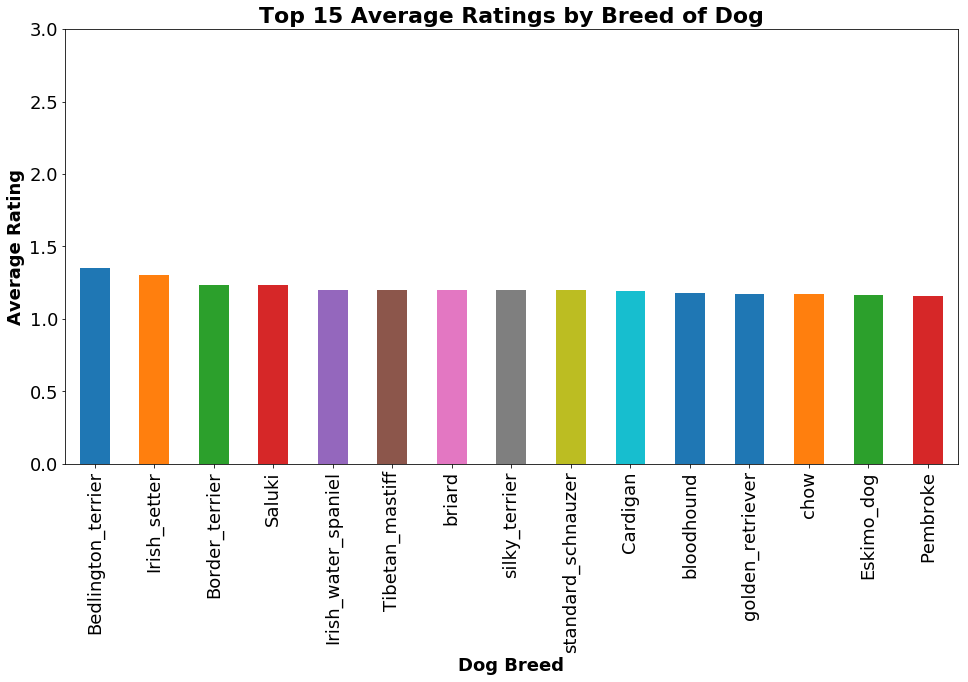

In [110]:
fig = plt.figure(figsize=(16,8))
main_df.groupby('breed_prediction_1')['ratings'].mean().nlargest(15).plot(kind='bar')
plt.title("Top 15 Average Ratings by Breed of Dog",fontsize=22,weight ='bold')
plt.ylabel("Average Rating",fontsize = 18,weight ='bold')
plt.xlabel("Dog Breed",fontsize = 18,weight ='bold')
plt.ylim(0,3);
plt.rcParams.update({'font.size': 18})

### The lowest average ratings by breed of dogs Based on first prediction algorithm

In [103]:
main_df.groupby('breed_prediction_1')['ratings'].mean().nsmallest(15)

breed_prediction_1
Japanese_spaniel               0.500000
Afghan_hound                   0.800000
Boston_bull                    0.820000
soft-coated_wheaten_terrier    0.820000
Ibizan_hound                   0.850000
Norwich_terrier                0.866667
Walker_hound                   0.875000
Scotch_terrier                 0.900000
basenji                        0.900000
miniature_schnauzer            0.925000
Tibetan_terrier                0.933333
Maltese_dog                    0.937500
Mexican_hairless               0.950000
Scottish_deerhound             0.950000
Welsh_springer_spaniel         0.950000
Name: ratings, dtype: float64

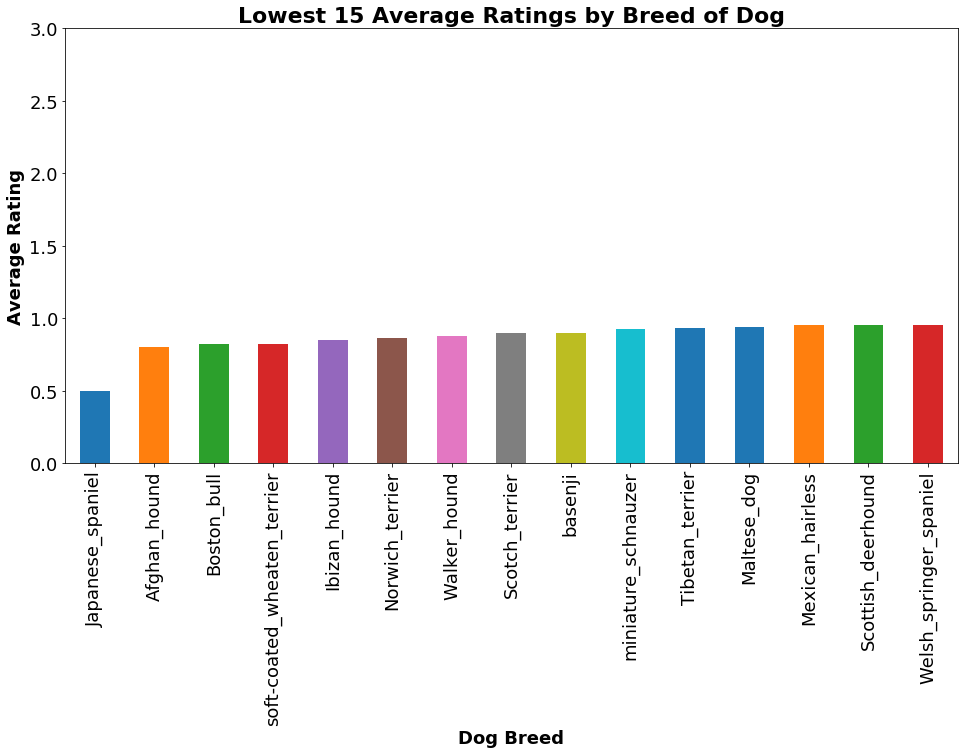

In [104]:
fig = plt.figure(figsize=(16,8))
main_df.groupby('breed_prediction_1')['ratings'].mean().nsmallest(15).plot(kind='bar')
plt.title("Lowest 15 Average Ratings by Breed of Dog",fontsize=22,weight ='bold')
plt.ylabel("Average Rating",fontsize = 18,weight ='bold')
plt.xlabel("Dog Breed",fontsize = 18,weight ='bold')
plt.ylim(0,3);
plt.rcParams.update({'font.size': 18})

### Distribution of Dog classes between classified dogs 

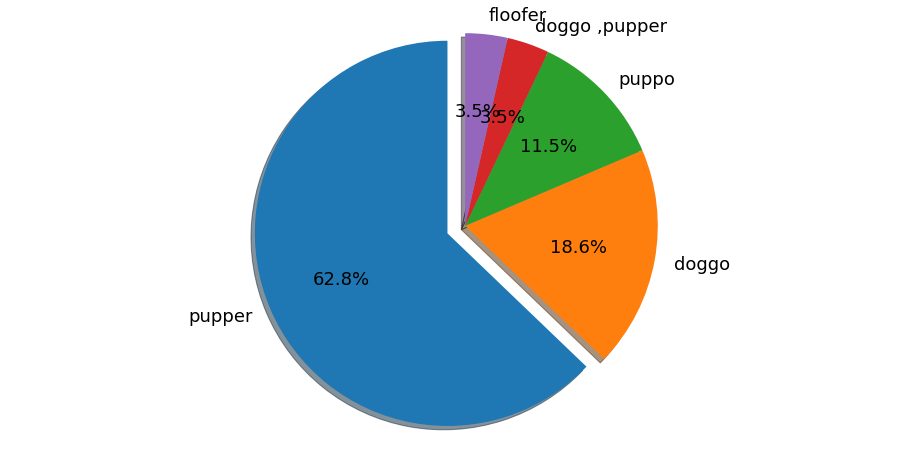

In [109]:
labels = ['pupper','doggo','puppo','doggo ,pupper','floofer']
sizes = main_df.dog_class.value_counts().values
explode=(0.1 ,0,0,0,0)

fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()